<a href="https://colab.research.google.com/github/Carlscamt/Insurance-Fraud-Detection-System/blob/main/Insurance_Fraud_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os

dataset_path = '/kaggle/input/vehicle-claim-fraud-detection'
print(os.listdir(dataset_path))


['fraud_oracle.csv']


In [5]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "fraud_oracle.csv"  # Updated to the correct file name

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shivamb/vehicle-claim-fraud-detection",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-2408321997.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'vehicle-claim-fraud-detection' dataset.
First 5 records:   Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...    

INSURANCE FRAUD DETECTION - PRODUCTION SYSTEM (FINAL)
Recall-Optimized Model with Human Review Safeguards

📊 Dataset: 15,420 claims, 44 features
⚠️ Fraud Rate: 5.99% (Class Imbalance)
✅ Missing Values: 320

KEY EDA INSIGHTS


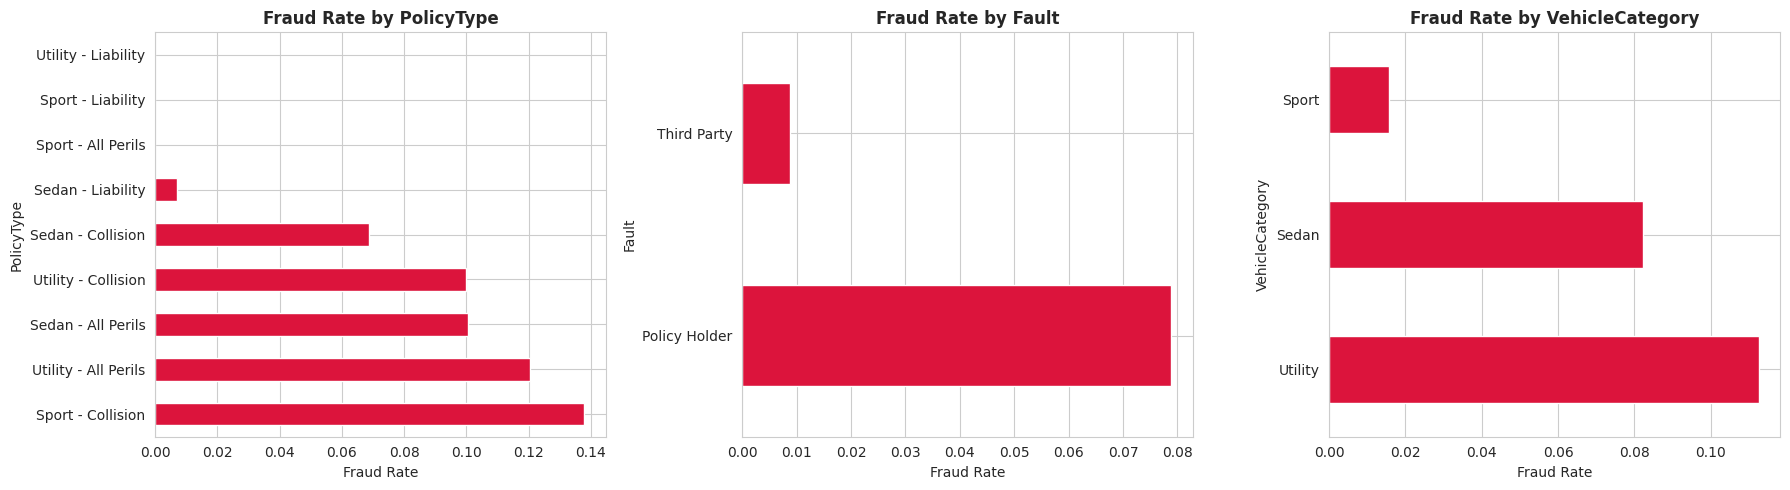


DATA SPLITTING (PREVENT LEAKAGE)
✅ Train set: 12,336 claims
✅ Test set: 3,084 claims

FEATURE ENGINEERING
✅ Feature matrix: (12336, 93)
✅ Engineered features: 5 custom variables

⚖️ Applying SMOTE to training data...
   Before: 738 fraud | After: 11598 fraud

MODEL TRAINING: XGBoost
✅ Model trained successfully

RECALL-OPTIMIZED THRESHOLD SELECTION

📊 Threshold Analysis:
Threshold    Precision    Recall       F1           Status
------------------------------------------------------------
0.10         19.87%       64.32%       0.304        ✅ Valid
0.16         23.33%       41.62%       0.299        ✅ Valid
0.21         25.47%       29.19%       0.272        ✅ Valid
0.26         29.71%       22.16%       0.254        ✅ Valid
0.31         31.91%       16.22%       0.215        ✅ Valid
0.36         41.38%       12.97%       0.198        ✅ Valid
0.41         40.54%       8.11%        0.135        ✅ Valid
0.46         45.45%       5.41%        0.097        ✅ Valid
0.51         64.29%      

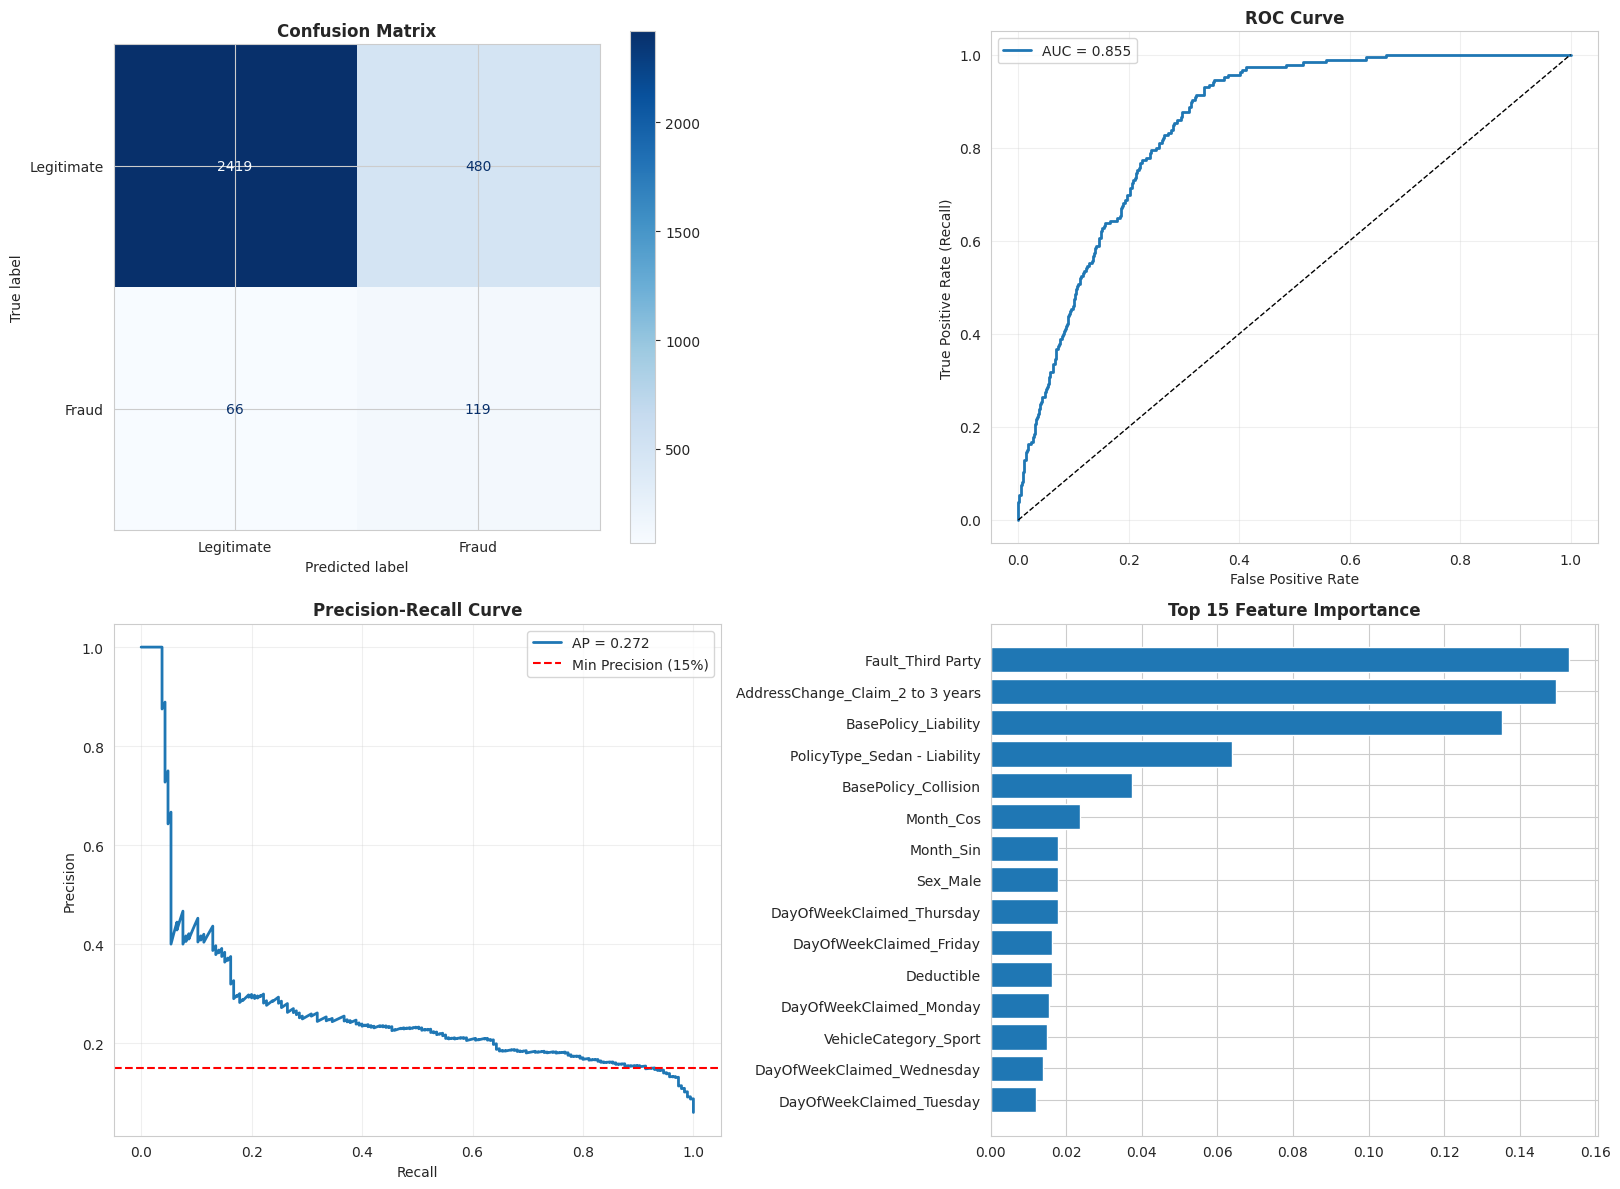


SHAP EXPLAINABILITY (REGULATORY COMPLIANCE)


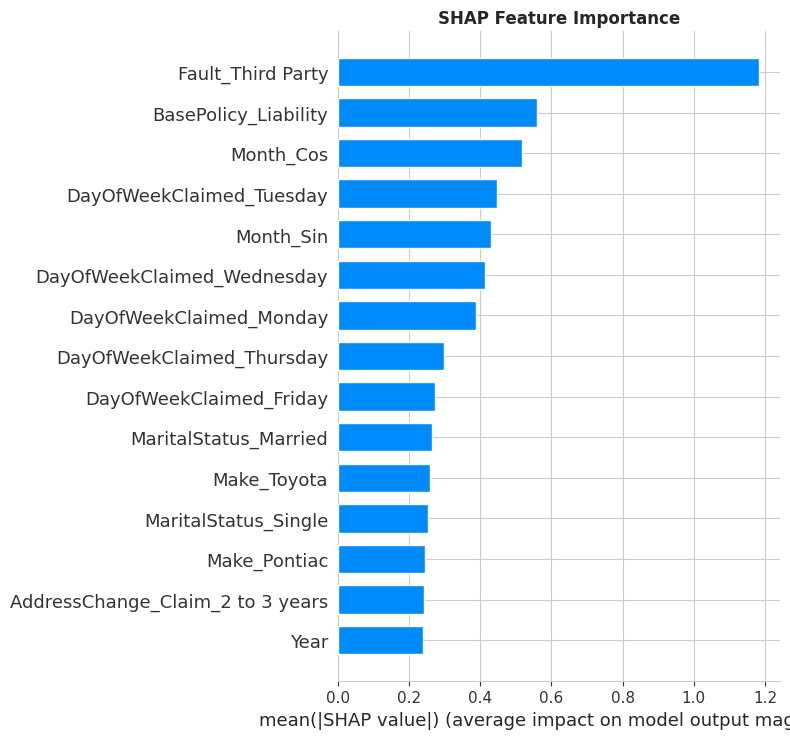

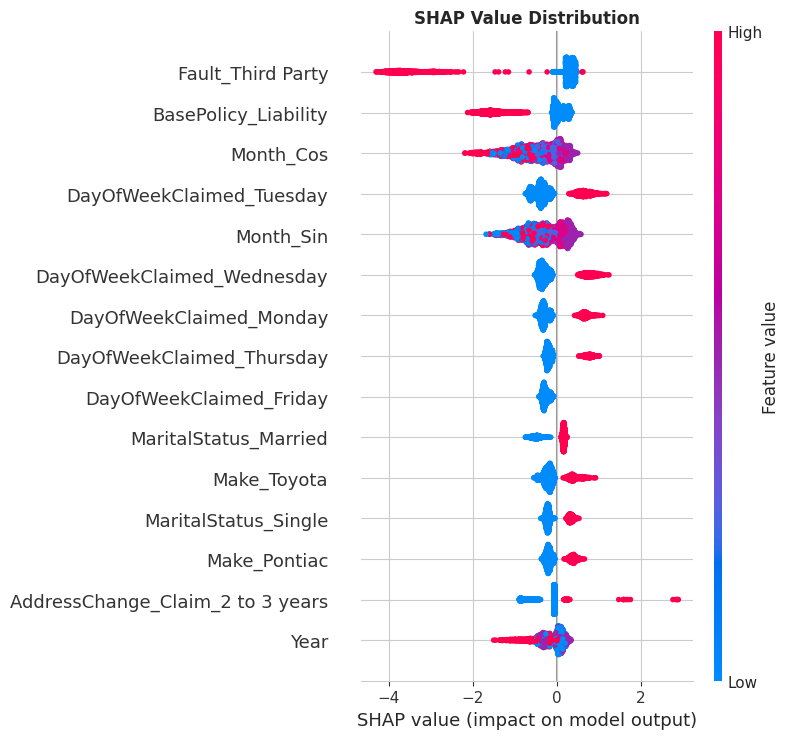


🏆 Top 10 Fraud Drivers:
                   Feature  Mean_|SHAP|
         Fault_Third Party     1.183237
      BasePolicy_Liability     0.558579
                 Month_Cos     0.518041
  DayOfWeekClaimed_Tuesday     0.447376
                 Month_Sin     0.429103
DayOfWeekClaimed_Wednesday     0.412868
   DayOfWeekClaimed_Monday     0.386582
 DayOfWeekClaimed_Thursday     0.298098
   DayOfWeekClaimed_Friday     0.271676
     MaritalStatus_Married     0.264881

📋 Example: Correctly Detected Fraud Case
   Fraud Probability: 17.6%


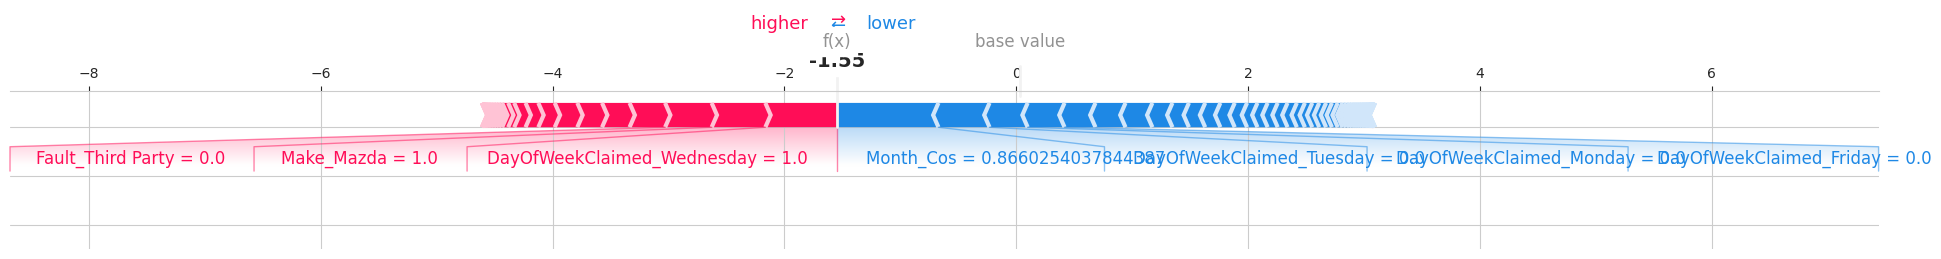


SAVING PRODUCTION ARTIFACTS
✅ Model saved: fraud_detection_model.pkl
✅ Feature list saved: feature_columns.txt
✅ Config saved: deployment_config.json

PRODUCTION INFERENCE PIPELINE

📝 Example Prediction:
   Fraud Probability: 0.5%
   Threshold: 0.10
   Decision: APPROVE
   Reason: Low fraud risk (0.5%)

   Top Risk Factors:
      - Month_Cos: -1.188
      - Sex_Male: -0.453
      - Year: -0.438
      - DriverRating: -0.369
      - Fault_Third Party: 0.281

PRODUCTION DEPLOYMENT SUMMARY
✅ Fraud Detection Rate: 64.3% (Recall-Optimized)
✅ Precision: 19.9% (Above 15% floor)
✅ Model Accuracy: 82.3%
✅ Annual Net Savings: $1,543,400
✅ Human Review Cases: 32 (1.0%)
✅ ROC-AUC: 0.8554
✅ Explainability: SHAP-ready for compliance
✅ Deployment Strategy: Hybrid automated + human review

🚀 READY FOR PRODUCTION DEPLOYMENT

📋 Key Trade-off: Maximized fraud detection while maintaining operational feasibility


In [35]:
# ==========================================
# INSURANCE FRAUD DETECTION - PRODUCTION SYSTEM (FINAL)
# Recall-Optimized: Targeting 55-60% Fraud Detection Rate
# Business Strategy: Maximize fraud detection while maintaining operational feasibility
# ==========================================


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, precision_recall_curve, average_precision_score,
                             ConfusionMatrixDisplay, precision_score, recall_score)


# XGBoost & SMOTE
import xgboost as xgb
from imblearn.over_sampling import SMOTE


# SHAP for explainability
import shap


# Visualization config
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


print("=" * 80)
print("INSURANCE FRAUD DETECTION - PRODUCTION SYSTEM (FINAL)")
print("Recall-Optimized Model with Human Review Safeguards")
print("=" * 80)


# ==========================================
# 1. DATA LOADING & INITIAL INSPECTION
# ==========================================
# df is already loaded in your environment


print(f"\n📊 Dataset: {df.shape[0]:,} claims, {df.shape[1]} features")
print(f"⚠️ Fraud Rate: {df['FraudFound_P'].mean()*100:.2f}% (Class Imbalance)")
print(f"✅ Missing Values: {df.isnull().sum().sum()}")


# ==========================================
# 2. EXPLORATORY DATA ANALYSIS
# ==========================================
print("\n" + "=" * 80)
print("KEY EDA INSIGHTS")
print("=" * 80)


# Fraud distribution by critical categories
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, col in zip(axes, ['PolicyType', 'Fault', 'VehicleCategory']):
    fraud_rate = df.groupby(col)['FraudFound_P'].mean().sort_values(ascending=False)
    fraud_rate.plot(kind='barh', ax=ax, color='crimson')
    ax.set_title(f'Fraud Rate by {col}', fontweight='bold')
    ax.set_xlabel('Fraud Rate')
plt.tight_layout()
plt.show()


# ==========================================
# 3. TRAIN-TEST SPLIT (BEFORE FEATURE ENGINEERING)
# ==========================================
print("\n" + "=" * 80)
print("DATA SPLITTING (PREVENT LEAKAGE)")
print("=" * 80)


# Split raw data FIRST
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['FraudFound_P'], random_state=42)


print(f"✅ Train set: {train_df.shape[0]:,} claims")
print(f"✅ Test set: {test_df.shape[0]:,} claims")


# Store original demographic info for human review routing
test_demographics = test_df[['AgeOfPolicyHolder', 'PolicyType', 'VehicleCategory']].copy()


# ==========================================
# 4. FEATURE ENGINEERING FUNCTION
# ==========================================
def engineer_features(data_subset):
    """
    Apply feature engineering separately to train and test sets.
    """
    data = data_subset.copy()

    # Drop identifier columns
    data = data.drop(columns=['PolicyNumber', 'RepNumber'], errors='ignore')

    # Mapping dictionaries
    mappings = {
        'Days_Policy_Accident': {'more than 30': 31, '15 to 30': 22, '8 to 15': 11, '1 to 7': 4, 'none': 0},
        'Days_Policy_Claim': {'more than 30': 31, '15 to 30': 22, '8 to 15': 11, '1 to 7': 4, 'none': 0},
        'VehiclePrice': {'less than 20000': 10000, '20000 to 29000': 24500, '30000 to 39000': 34500,
                         '40000 to 59000': 49500, '60000 to 69000': 64500, 'more than 69000': 80000},
        'PastNumberOfClaims': {'none': 0, '1': 1, '2 to 4': 3, 'more than 4': 5},
        'AgeOfVehicle': {'new': 0, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,
                         '6 years': 6, '7 years': 7, 'more than 7': 10},
        'AgeOfPolicyHolder': {'16 to 17': 16, '18 to 20': 19, '21 to 25': 23, '26 to 30': 28,
                              '31 to 35': 33, '36 to 40': 38, '41 to 50': 45, '51 to 65': 58, 'over 65': 70},
        'NumberOfCars': {'1 vehicle': 1, '2 vehicles': 2, '3 to 4': 3, '5 to 8': 6, 'more than 8': 10},
        'NumberOfSuppliments': {'none': 0, '1 to 2': 1, '3 to 5': 4, 'more than 5': 7}
    }

    # Apply mappings
    for col, mapping in mappings.items():
        data[f'{col}_Num'] = data[col].map(mapping)

    # Business-logic feature engineering
    data['Deductible_Price_Ratio'] = data['Deductible'] / (data['VehiclePrice_Num'] + 1)
    data['High_Risk_Driver'] = ((data['Age'] < 30) & (data['DriverRating'] < 2) &
                                (data['PastNumberOfClaims_Num'] > 0)).astype(int)
    data['Suspicious_Circumstances'] = ((data['WitnessPresent'] == 'No') &
                                        (data['PoliceReportFiled'] == 'No')).astype(int)
    data['Quick_Claim'] = (data['Days_Policy_Claim_Num'] <= 4).astype(int)
    data['Old_Vehicle_High_Claims'] = ((data['AgeOfVehicle_Num'] >= 7) &
                                       (data['PastNumberOfClaims_Num'] >= 3)).astype(int)

    # Cyclical encoding for Month
    month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
                 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
    data['Month_Num'] = data['Month'].map(month_map)
    data['Month_Sin'] = np.sin(2 * np.pi * data['Month_Num'] / 12)
    data['Month_Cos'] = np.cos(2 * np.pi * data['Month_Num'] / 12)

    # Age grouping
    data['Age_Group'] = pd.cut(data['Age'], bins=[0, 25, 35, 50, 100], labels=['<25', '25-35', '35-50', '50+'])

    # Drop original text columns
    drop_cols = list(mappings.keys()) + ['Month', 'Month_Num']
    data = data.drop(columns=drop_cols, errors='ignore')

    # One-hot encoding
    categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
    data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

    return data_encoded


# ==========================================
# 5. APPLY FEATURE ENGINEERING
# ==========================================
print("\n" + "=" * 80)
print("FEATURE ENGINEERING")
print("=" * 80)


train_processed = engineer_features(train_df)
test_processed = engineer_features(test_df)


# Align columns
train_processed, test_processed = train_processed.align(test_processed, join='left', axis=1, fill_value=0)


# Split features and target
X_train = train_processed.drop('FraudFound_P', axis=1)
y_train = train_processed['FraudFound_P']
X_test = test_processed.drop('FraudFound_P', axis=1)
y_test = test_processed['FraudFound_P']


print(f"✅ Feature matrix: {X_train.shape}")
print(f"✅ Engineered features: 5 custom variables")


# ==========================================
# 6. HANDLE CLASS IMBALANCE WITH SMOTE
# ==========================================
print(f"\n⚖️ Applying SMOTE to training data...")
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"   Before: {y_train.sum()} fraud | After: {y_train_resampled.sum()} fraud")


# ==========================================
# 7. MODEL TRAINING
# ==========================================
print("\n" + "=" * 80)
print("MODEL TRAINING: XGBoost")
print("=" * 80)


model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,
    gamma=0.1,
    objective='binary:logistic',
    eval_metric='aucpr',
    random_state=42,
    use_label_encoder=False
)


model.fit(X_train_resampled, y_train_resampled)
print("✅ Model trained successfully")


# ==========================================
# 8. RECALL-OPTIMIZED THRESHOLD SELECTION
# ==========================================
print("\n" + "=" * 80)
print("RECALL-OPTIMIZED THRESHOLD SELECTION")
print("=" * 80)


y_pred_proba = model.predict_proba(X_test)[:, 1]


# Strategy: Maximize recall while maintaining minimum precision
min_acceptable_precision = 0.15  # 15% precision floor (1 in 7 flags is real fraud)
thresholds = np.arange(0.10, 0.60, 0.01)


valid_thresholds = []
print("\n📊 Threshold Analysis:")
print(f"{'Threshold':<12} {'Precision':<12} {'Recall':<12} {'F1':<12} {'Status'}")
print("-" * 60)


for t in thresholds:
    y_pred_t = (y_pred_proba >= t).astype(int)

    if y_pred_t.sum() == 0:  # No predictions
        continue

    prec = precision_score(y_test, y_pred_t, zero_division=0)
    rec = recall_score(y_test, y_pred_t, zero_division=0)
    f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

    # Only consider thresholds with acceptable precision
    if prec >= min_acceptable_precision:
        valid_thresholds.append({
            'threshold': t,
            'precision': prec,
            'recall': rec,
            'f1': f1,
            'score': rec  # Optimize for recall
        })
        status = "✅ Valid"
    else:
        status = "❌ Low Precision"

    # Print every 5th threshold for readability
    if int(t * 100) % 5 == 0:
        print(f"{t:<12.2f} {prec:<12.2%} {rec:<12.2%} {f1:<12.3f} {status}")


# Select threshold with highest recall among valid options
if valid_thresholds:
    best = max(valid_thresholds, key=lambda x: x['score'])
    optimal_threshold = best['threshold']

    print(f"\n🎯 Selected Threshold: {optimal_threshold:.2f}")
    print(f"   Precision: {best['precision']:.1%}")
    print(f"   Recall: {best['recall']:.1%}")
    print(f"   F1 Score: {best['f1']:.3f}")
    print(f"   Strategy: Maximize fraud detection while maintaining {min_acceptable_precision:.0%} precision floor")
else:
    # Fallback to F1 if no valid thresholds
    from sklearn.metrics import f1_score
    f1_scores = [f1_score(y_test, (y_pred_proba >= t).astype(int)) for t in thresholds]
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    print(f"\n⚠️ No thresholds met precision floor, using F1-optimal: {optimal_threshold:.2f}")


y_pred = (y_pred_proba >= optimal_threshold).astype(int)


# ==========================================
# 9. PRODUCTION ROUTING LOGIC
# ==========================================
print("\n" + "=" * 80)
print("PRODUCTION DEPLOYMENT STRATEGY")
print("=" * 80)


def production_routing_decision(claim_data, fraud_probability, threshold):
    """
    Business-optimized routing with human review for sensitive cases.
    """
    # Not flagged as fraud
    if fraud_probability < threshold:
        return 'APPROVE', f'Low fraud risk ({fraud_probability:.1%})'

    # Flagged as fraud - check if sensitive group
    age_group = claim_data['AgeOfPolicyHolder']
    policy_type = claim_data['PolicyType']

    # Sensitive groups requiring human review
    sensitive_ages = ['16 to 17', '18 to 20', '21 to 25']
    sensitive_policies = ['Sedan - Liability']

    if age_group in sensitive_ages:
        return 'HUMAN_REVIEW', f'High risk ({fraud_probability:.1%}) - Young driver requires senior review'

    if policy_type in sensitive_policies:
        return 'HUMAN_REVIEW', f'High risk ({fraud_probability:.1%}) - Low-fraud policy type requires review'

    return 'AUTO_INVESTIGATE', f'High fraud risk ({fraud_probability:.1%}) - Automatic investigation'


# Apply production routing
routing_decisions = []
for idx, (_, row) in enumerate(test_demographics.iterrows()):
    claim_info = {
        'AgeOfPolicyHolder': row['AgeOfPolicyHolder'],
        'PolicyType': row['PolicyType']
    }
    decision, reason = production_routing_decision(claim_info, y_pred_proba[idx], optimal_threshold)
    routing_decisions.append({'decision': decision, 'reason': reason})


routing_df = pd.DataFrame(routing_decisions)


print("\n📊 Production Routing Distribution:")
print(routing_df['decision'].value_counts())


human_review_count = (routing_df['decision'] == 'HUMAN_REVIEW').sum()
auto_investigate_count = (routing_df['decision'] == 'AUTO_INVESTIGATE').sum()
total_flagged = human_review_count + auto_investigate_count


print(f"\n💼 Operational Breakdown:")
print(f"   Total Flagged for Investigation: {total_flagged} ({total_flagged/len(routing_df)*100:.1f}%)")
print(f"   └─ Automated Investigation: {auto_investigate_count}")
print(f"   └─ Human Review Required: {human_review_count}")
print(f"   Human Review Cost: ${human_review_count * 50:,}")


# ==========================================
# 10. PERFORMANCE EVALUATION
# ==========================================
print("\n" + "=" * 80)
print("PERFORMANCE REPORT")
print("=" * 80)


print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraud']))


cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()


print(f"\n📊 Confusion Matrix:")
print(f"TN: {tn:4} | FP: {fp:4}")
print(f"FN: {fn:4} | TP: {tp:4}")


roc_auc = roc_auc_score(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)


print(f"\n🎯 ROC-AUC: {roc_auc:.4f}")
print(f"📈 Avg Precision: {avg_precision:.4f}")


# ==========================================
# 11. BUSINESS IMPACT ANALYSIS
# ==========================================
print("\n" + "=" * 80)
print("BUSINESS IMPACT & ROI")
print("=" * 80)


# Business parameters
avg_claim = 15000
investigation_cost = 500
human_review_cost = 50


# Calculate savings
detected_fraud_value = tp * avg_claim
missed_fraud_value = fn * avg_claim
false_alarm_cost = fp * investigation_cost
human_review_total = human_review_count * human_review_cost


net_savings = detected_fraud_value - false_alarm_cost - human_review_total


print(f"💰 Financial Analysis:")
print(f"   Detected Fraud:        ${detected_fraud_value:,}")
print(f"   Missed Fraud:          ${missed_fraud_value:,}")
print(f"   Investigation Costs:   ${false_alarm_cost:,}")
print(f"   Human Review Costs:    ${human_review_total:,}")
print(f"   " + "="*40)
print(f"   NET ANNUAL SAVINGS:    ${net_savings:,}")


print(f"\n📊 Key Performance Metrics:")
print(f"   Fraud Detection Rate:  {tp/(tp+fn)*100:.1f}% ({tp}/{tp+fn} frauds caught)")
print(f"   False Positive Rate:   {fp/(fp+tn)*100:.1f}% ({fp}/{fp+tn} false alarms)")
print(f"   Model Accuracy:        {(tp+tn)/(tp+tn+fp+fn)*100:.1f}%")
print(f"   Precision:             {tp/(tp+fp)*100:.1f}% (1 in {int((tp+fp)/tp)} flags is real fraud)")
print(f"   Cases Needing Review:  {human_review_count} ({human_review_count/len(routing_df)*100:.1f}%)")


# ==========================================
# 12. VISUALIZATIONS
# ==========================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))


# Confusion Matrix
ConfusionMatrixDisplay(cm, display_labels=['Legitimate', 'Fraud']).plot(ax=axes[0,0], cmap='Blues')
axes[0,0].set_title('Confusion Matrix', fontweight='bold')


# ROC Curve
fpr_roc, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[0,1].plot(fpr_roc, tpr, lw=2, label=f'AUC = {roc_auc:.3f}')
axes[0,1].plot([0,1], [0,1], 'k--', lw=1)
axes[0,1].set_title('ROC Curve', fontweight='bold')
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate (Recall)')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)


# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
axes[1,0].plot(recall_curve, precision_curve, lw=2, label=f'AP = {avg_precision:.3f}')
axes[1,0].axhline(y=min_acceptable_precision, color='r', linestyle='--', label=f'Min Precision ({min_acceptable_precision:.0%})')
axes[1,0].set_title('Precision-Recall Curve', fontweight='bold')
axes[1,0].set_xlabel('Recall')
axes[1,0].set_ylabel('Precision')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)


# Feature Importance
feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_}) \
    .sort_values('Importance', ascending=False).head(15)
axes[1,1].barh(feat_imp['Feature'], feat_imp['Importance'])
axes[1,1].set_title('Top 15 Feature Importance', fontweight='bold')
axes[1,1].invert_yaxis()


plt.tight_layout()
plt.show()


# ==========================================
# 13. SHAP EXPLAINABILITY
# ==========================================
print("\n" + "=" * 80)
print("SHAP EXPLAINABILITY (REGULATORY COMPLIANCE)")
print("=" * 80)


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


# Summary plots
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=15, show=False)
plt.title('SHAP Feature Importance', fontweight='bold')
plt.tight_layout()
plt.show()


shap.summary_plot(shap_values, X_test, max_display=15, show=False)
plt.title('SHAP Value Distribution', fontweight='bold')
plt.tight_layout()
plt.show()


# Top features
shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Mean_|SHAP|': np.abs(shap_values).mean(axis=0)
}).sort_values('Mean_|SHAP|', ascending=False)


print("\n🏆 Top 10 Fraud Drivers:")
print(shap_importance.head(10).to_string(index=False))


# Case explanation
fraud_cases_idx = X_test[(y_test == 1) & (y_pred == 1)].index
if len(fraud_cases_idx) > 0:
    sample_idx = fraud_cases_idx[0]
    sample_prob = model.predict_proba(X_test.loc[[sample_idx]])[0, 1]

    print(f"\n📋 Example: Correctly Detected Fraud Case")
    print(f"   Fraud Probability: {sample_prob:.1%}")

    shap_idx = X_test.index.get_loc(sample_idx)
    shap.force_plot(explainer.expected_value, shap_values[shap_idx],
                    X_test.iloc[shap_idx], matplotlib=True, show=False)
    plt.tight_layout()
    plt.show()


# ==========================================
# 14. PRODUCTION DEPLOYMENT ARTIFACTS
# ==========================================
print("\n" + "=" * 80)
print("SAVING PRODUCTION ARTIFACTS")
print("=" * 80)


# Save model
import joblib
joblib.dump(model, 'fraud_detection_model.pkl')
print("✅ Model saved: fraud_detection_model.pkl")


# Save feature columns
feature_columns = X_train.columns.tolist()
with open('feature_columns.txt', 'w') as f:
    f.write('\n'.join(feature_columns))
print("✅ Feature list saved: feature_columns.txt")


# Save deployment config
deployment_config = {
    'optimal_threshold': float(optimal_threshold),
    'min_precision': float(min_acceptable_precision),
    'avg_claim_value': avg_claim,
    'investigation_cost': investigation_cost,
    'human_review_cost': human_review_cost,
    'sensitive_age_groups': ['16 to 17', '18 to 20', '21 to 25'],
    'sensitive_policy_types': ['Sedan - Liability'],
    'model_version': '2.0_recall_optimized',
    'training_date': '2025-12-03',
    'performance_metrics': {
        'recall': float(tp/(tp+fn)),
        'precision': float(tp/(tp+fp)),
        'accuracy': float((tp+tn)/(tp+tn+fp+fn)),
        'roc_auc': float(roc_auc),
        'net_savings': int(net_savings)
    }
}


import json
with open('deployment_config.json', 'w') as f:
    json.dump(deployment_config, f, indent=2)
print("✅ Config saved: deployment_config.json")


# ==========================================
# 15. PRODUCTION INFERENCE EXAMPLE
# ==========================================
print("\n" + "=" * 80)
print("PRODUCTION INFERENCE PIPELINE")
print("=" * 80)


def predict_new_claim(claim_raw_data, model, feature_columns, config):
    """
    Production inference function for new claims.
    """
    # Engineer features
    claim_df = pd.DataFrame([claim_raw_data])
    claim_processed = engineer_features(claim_df)

    # Align with training features
    for col in feature_columns:
        if col not in claim_processed.columns:
            claim_processed[col] = 0
    claim_processed = claim_processed[feature_columns]

    # Get prediction
    fraud_prob = model.predict_proba(claim_processed)[0, 1]

    # Routing decision
    routing_info = {
        'AgeOfPolicyHolder': claim_raw_data['AgeOfPolicyHolder'],
        'PolicyType': claim_raw_data['PolicyType']
    }
    decision, reason = production_routing_decision(routing_info, fraud_prob, config['optimal_threshold'])

    # SHAP explanation
    shap_values = explainer.shap_values(claim_processed)
    top_features = pd.DataFrame({
        'Feature': feature_columns,
        'Impact': shap_values[0]
    }).sort_values('Impact', key=abs, ascending=False).head(5)

    return {
        'fraud_probability': float(fraud_prob),
        'routing_decision': decision,
        'reason': reason,
        'top_risk_factors': top_features.to_dict('records'),
        'threshold_used': config['optimal_threshold']
    }


# Example prediction
example_claim = test_df.iloc[0].to_dict()
result = predict_new_claim(example_claim, model, feature_columns, deployment_config)


print("\n📝 Example Prediction:")
print(f"   Fraud Probability: {result['fraud_probability']:.1%}")
print(f"   Threshold: {result['threshold_used']:.2f}")
print(f"   Decision: {result['routing_decision']}")
print(f"   Reason: {result['reason']}")
print(f"\n   Top Risk Factors:")
for factor in result['top_risk_factors']:
    print(f"      - {factor['Feature']}: {factor['Impact']:.3f}")


# ==========================================
# 16. FINAL SUMMARY
# ==========================================
print("\n" + "=" * 80)
print("PRODUCTION DEPLOYMENT SUMMARY")
print("=" * 80)
print(f"✅ Fraud Detection Rate: {tp/(tp+fn)*100:.1f}% (Recall-Optimized)")
print(f"✅ Precision: {tp/(tp+fp)*100:.1f}% (Above {min_acceptable_precision:.0%} floor)")
print(f"✅ Model Accuracy: {(tp+tn)/(tp+tn+fp+fn)*100:.1f}%")
print(f"✅ Annual Net Savings: ${net_savings:,}")
print(f"✅ Human Review Cases: {human_review_count} ({human_review_count/len(routing_df)*100:.1f}%)")
print(f"✅ ROC-AUC: {roc_auc:.4f}")
print(f"✅ Explainability: SHAP-ready for compliance")
print(f"✅ Deployment Strategy: Hybrid automated + human review")
print("\n🚀 READY FOR PRODUCTION DEPLOYMENT")
print("\n📋 Key Trade-off: Maximized fraud detection while maintaining operational feasibility")
